In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pandas_bokeh

In [2]:
!ls -ahl dati 


total 112M
drwxrwxr-x 2 cio cio 4,0K Dec 30 10:40 .
drwxrwxr-x 5 cio cio 4,0K Dec 30 17:17 ..
-rw-rw-r-- 1 cio cio  844 Dec 30 10:40 anagrafica-vaccini-summary-latest.csv
-rw-rw-r-- 1 cio cio 5,2K Dec 30 10:40 anagrafica-vaccini-summary-latest.json
-rw-rw-r-- 1 cio cio 329K Dec 30 10:40 consegne-vaccini-latest.csv
-rw-rw-r-- 1 cio cio 2,0M Dec 30 10:40 consegne-vaccini-latest.json
-rw-rw-r-- 1 cio cio   66 Dec 30 10:40 last-update-dataset.json
-rw-rw-r-- 1 cio cio 5,0K Dec 27 12:20 platea.csv
-rw-rw-r-- 1 cio cio 4,4K Dec 27 12:20 platea-dose-addizionale-booster.csv
-rw-rw-r-- 1 cio cio  33K Dec 27 12:20 platea-dose-addizionale-booster.json
-rw-rw-r-- 1 cio cio  36K Dec 27 12:20 platea.json
-rw-rw-r-- 1 cio cio  22K Dec 27 12:20 punti-somministrazione-latest.csv
-rw-rw-r-- 1 cio cio 103K Dec 27 12:20 punti-somministrazione-latest.json
-rw-rw-r-- 1 cio cio 155K Dec 27 12:20 punti-somministrazione-tipologia.csv
-rw-rw-r-- 1 cio cio 776K Dec 27 12:20 punti-somministrazione-tipologia.json


In [3]:
!cat dati/last-update-dataset.json

{
    "ultimo_aggiornamento": "2021-12-30T05:15:41.824488+00:00"
}

In [4]:
df_anagrafica = pd.read_csv('dati/anagrafica-vaccini-summary-latest.csv')  # si aggiorna
df_consegne = pd.read_csv('dati/consegne-vaccini-latest.csv') # si aggiorna
df_platea = pd.read_csv('dati/platea.csv')
df_platea_booster = pd.read_csv('dati/platea-dose-addizionale-booster.csv')
df_punti_som_latest = pd.read_csv('dati/punti-somministrazione-latest.csv')
df_punti_som_tipologia = pd.read_csv('dati/punti-somministrazione-tipologia.csv')
df_guariti = pd.read_csv('dati/soggetti-guariti.csv')  # si aggiorna
df_somministrazione = pd.read_csv('dati/somministrazioni-vaccini-latest.csv')  # si aggiorna
df_somministrazione_summary = pd.read_csv('dati/somministrazioni-vaccini-summary-latest.csv')  # si aggiorna
df_vaccini = pd.read_csv('dati/vaccini-summary-latest.csv')   # si aggiorna

## Anagrafica df_anagrafica

In [5]:
df_anagrafica

,fascia_anagrafica,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,ultimo_aggiornamento
0,05-11,267496,138624,128872,267238,0,258,0,2021-12-30
1,12-19,7095473,3643350,3452123,3601265,3228460,116032,149716,2021-12-30
2,20-29,11316452,5862914,5453538,5270748,4887136,206799,951769,2021-12-30
3,30-39,12348071,6273873,6074198,5657721,5242802,209168,1238380,2021-12-30
4,40-49,16512991,8147754,8365237,7216158,6740966,285993,2269874,2021-12-30
5,50-59,19841223,9705030,10136193,8223822,7603822,339307,3674272,2021-12-30
6,60-69,16669014,8112423,8556591,6660218,6080672,231720,3696404,2021-12-30
7,70-79,14384021,6805314,7578707,5464276,5220467,158160,3541118,2021-12-30
8,80-89,9695538,4034434,5661104,3480761,3412004,76423,2726350,2021-12-30
9,90+,2146696,638374,1508322,803774,774888,19799,548235,2021-12-30


In [6]:
df_anagrafica['ultimo_aggiornamento'].unique()

array(['2021-12-30'], dtype=object)

In [7]:
df_anagrafica.shape


(10, 9)

## Consegne df_consegne

In [8]:
df_consegne

,area,fornitore,numero_dosi,data_consegna,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,ABR,Pfizer/BioNTech,135,2020-12-27,ITF,ITF1,13,Abruzzo
1,ABR,Pfizer/BioNTech,7800,2020-12-30,ITF,ITF1,13,Abruzzo
2,ABR,Pfizer/BioNTech,3900,2021-01-05,ITF,ITF1,13,Abruzzo
3,ABR,Pfizer/BioNTech,3900,2021-01-07,ITF,ITF1,13,Abruzzo
4,ABR,Pfizer/BioNTech,3900,2021-01-11,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...
5985,VEN,Moderna,3,2021-12-21,ITH,ITH3,5,Veneto
5986,VEN,Moderna,63100,2021-12-22,ITH,ITH3,5,Veneto
5987,VEN,Pfizer/BioNTech,121680,2021-12-22,ITH,ITH3,5,Veneto
5988,VEN,Moderna,2,2021-12-28,ITH,ITH3,5,Veneto


## Platea df_platea

In [9]:
df_platea

,area,nome_area,fascia_anagrafica,totale_popolazione
0,ABR,Abruzzo,05-11,76431
1,ABR,Abruzzo,12-19,94727
2,ABR,Abruzzo,20-29,125230
3,ABR,Abruzzo,30-39,146965
4,ABR,Abruzzo,40-49,187162
...,...,...,...,...
184,VEN,Veneto,40-49,715790
185,VEN,Veneto,50-59,806474
186,VEN,Veneto,60-69,610635
187,VEN,Veneto,70-79,494721


## Platea booster df_platea_booster

In [10]:
df_platea_booster

,area,nome_area,categoria_prevalente,totale_popolazione
0,ABR,Abruzzo,12-19,17099
1,ABR,Abruzzo,20-29,48958
2,ABR,Abruzzo,30-39,56429
3,ABR,Abruzzo,40-49,95005
4,ABR,Abruzzo,50-59,127410
...,...,...,...,...
163,VEN,Veneto,40-49,379810
164,VEN,Veneto,50-59,542674
165,VEN,Veneto,60-69,475409
166,VEN,Veneto,70-79,428943


## Punti somministrazione latest df_punti_som_latest

In [11]:
df_punti_som_latest

,area,provincia,comune,presidio_ospedaliero,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,ABR,CHIETI,CHIETI,PRESIDIO OSPEDALIERO SS ANNUNZIATA,ITF,ITF1,13,Abruzzo
1,ABR,CHIETI,LANCIANO,PRESIDIO OSPEDALIERO RENZETTI,ITF,ITF1,13,Abruzzo
2,ABR,CHIETI,VASTO,PRESIDIO OSPEDALIERO SAN PIO,ITF,ITF1,13,Abruzzo
3,ABR,L'AQUILA,AVEZZANO,P.O. SS. FILIPPO E NICOLA,ITF,ITF1,13,Abruzzo
4,ABR,L'AQUILA,L'AQUILA,PRESIDIO OSPEDALIERO SAN SALVATORE,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...
288,VEN,ROVIGO,ROVIGO,"OSPEDALE ""SANTA MARIA DELLA MISERICORDIA""",ITH,ITH3,5,Veneto
289,VEN,TREVISO,VITTORIO VENETO,OSPEDALE DI VITTORIO VENETO,ITH,ITH3,5,Veneto
290,VEN,VENEZIA,VENEZIA MESTRE,OSPEDALE DELL'ANGELO,ITH,ITH3,5,Veneto
291,VEN,VERONA,VERONA,AZIENDA OSPEDALIERA UNIVERSITARIA INTEGRATA DI...,ITH,ITH3,5,Veneto


## Punti somministrazione tipologia df_punti_som_tipologia

In [12]:
df_punti_som_tipologia

,area,denominazione_struttura,tipologia,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,ABR,ANESIS S.R.L.,RIA,ITF,ITF1,13,Abruzzo
1,ABR,ASS. FOCOLARE MARIA REGINA ONU,RIA,ITF,ITF1,13,Abruzzo
2,ABR,CDC S.CAMILLA-C.RIA.VILLA PINI,RIA,ITF,ITF1,13,Abruzzo
3,ABR,CENTO RIABILITAZIONE S.AGNESE,RIA,ITF,ITF1,13,Abruzzo
4,ABR,CENTRO EX ART 26 PIZZOLI,RIA,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...
2448,VEN,OSPEDALE MILITARE (PUNTO VACCINAZIONI),STS,ITH,ITH3,5,Veneto
2449,VEN,PALAZZETTO DELLO SPORT 'BORGO ROSSI' (PUNTO VA...,STS,ITH,ITH3,5,Veneto
2450,VEN,PALAZZETTO DELLO SPORT DI CITTADELLA,STS,ITH,ITH3,5,Veneto
2451,VEN,PALAZZETTO DELLO SPORT DI LOREGGIA,STS,ITH,ITH3,5,Veneto


## Guariti df_guariti

In [13]:
df_guariti

,area,nome_area,fascia_anagrafica,totale_guariti
0,ABR,Abruzzo,05-11,1588
1,ABR,Abruzzo,12-19,1350
2,ABR,Abruzzo,20-29,899
3,ABR,Abruzzo,30-39,952
4,ABR,Abruzzo,40-49,1060
...,...,...,...,...
184,VEN,Veneto,40-49,10315
185,VEN,Veneto,50-59,8885
186,VEN,Veneto,60-69,3555
187,VEN,Veneto,70-79,1374


## Somministrazione df_somministrazione

In [14]:
df_somministrazione

,data_somministrazione,fornitore,area,fascia_anagrafica,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,2020-12-27,Pfizer/BioNTech,ABR,20-29,1,1,2,0,0,0,ITF,ITF1,13,Abruzzo
1,2020-12-27,Pfizer/BioNTech,ABR,30-39,1,4,5,0,0,0,ITF,ITF1,13,Abruzzo
2,2020-12-27,Pfizer/BioNTech,ABR,40-49,1,8,9,0,0,0,ITF,ITF1,13,Abruzzo
3,2020-12-27,Pfizer/BioNTech,ABR,50-59,7,6,13,0,0,0,ITF,ITF1,13,Abruzzo
4,2020-12-27,Pfizer/BioNTech,ABR,60-69,12,4,16,0,0,0,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167850,2021-12-29,Pfizer/BioNTech,VEN,70-79,689,954,39,54,0,1550,ITH,ITH3,5,Veneto
167851,2021-12-29,Pfizer/BioNTech,VEN,80-89,227,410,15,15,0,607,ITH,ITH3,5,Veneto
167852,2021-12-29,Pfizer/BioNTech,VEN,90+,38,144,9,9,0,164,ITH,ITH3,5,Veneto
167853,2021-12-29,Vaxzevria (AstraZeneca),SIC,60-69,0,1,0,1,0,0,ITG,ITG1,19,Sicilia


In [15]:
np.sort(df_somministrazione['data_somministrazione'].unique())

array(['2020-12-27', '2020-12-28', '2020-12-29', '2020-12-30',
       '2020-12-31', '2021-01-01', '2021-01-02', '2021-01-03',
       '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
       '2021-01-08', '2021-01-09', '2021-01-10', '2021-01-11',
       '2021-01-12', '2021-01-13', '2021-01-14', '2021-01-15',
       '2021-01-16', '2021-01-17', '2021-01-18', '2021-01-19',
       '2021-01-20', '2021-01-21', '2021-01-22', '2021-01-23',
       '2021-01-24', '2021-01-25', '2021-01-26', '2021-01-27',
       '2021-01-28', '2021-01-29', '2021-01-30', '2021-01-31',
       '2021-02-01', '2021-02-02', '2021-02-03', '2021-02-04',
       '2021-02-05', '2021-02-06', '2021-02-07', '2021-02-08',
       '2021-02-09', '2021-02-10', '2021-02-11', '2021-02-12',
       '2021-02-13', '2021-02-14', '2021-02-15', '2021-02-16',
       '2021-02-17', '2021-02-18', '2021-02-19', '2021-02-20',
       '2021-02-21', '2021-02-22', '2021-02-23', '2021-02-24',
       '2021-02-25', '2021-02-26', '2021-02-27', '2021-

In [16]:
df_subset_summary = df_somministrazione[df_somministrazione['data_somministrazione'] == '2021-12-15']
df_subset_summary.shape


(400, 14)

In [17]:
df_subset_summary

,data_somministrazione,fornitore,area,fascia_anagrafica,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
161982,2021-12-15,Janssen,EMR,30-39,0,1,1,0,0,0,ITH,ITH5,8,Emilia-Romagna
161983,2021-12-15,Janssen,EMR,40-49,1,1,2,0,0,0,ITH,ITH5,8,Emilia-Romagna
161984,2021-12-15,Janssen,EMR,50-59,0,1,1,0,0,0,ITH,ITH5,8,Emilia-Romagna
161985,2021-12-15,Janssen,EMR,70-79,0,1,1,0,0,0,ITH,ITH5,8,Emilia-Romagna
161986,2021-12-15,Janssen,FVG,60-69,1,0,1,0,0,0,ITH,ITH4,6,Friuli-Venezia Giulia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162377,2021-12-15,Pfizer/BioNTech,VEN,50-59,2127,2441,201,159,2,4206,ITH,ITH3,5,Veneto
162378,2021-12-15,Pfizer/BioNTech,VEN,60-69,1990,2361,104,103,2,4142,ITH,ITH3,5,Veneto
162379,2021-12-15,Pfizer/BioNTech,VEN,70-79,2414,2829,77,72,0,5094,ITH,ITH3,5,Veneto
162380,2021-12-15,Pfizer/BioNTech,VEN,80-89,932,1585,31,43,0,2443,ITH,ITH3,5,Veneto


In [18]:
df_somministrazione['fornitore'].unique()

array(['Pfizer/BioNTech', 'Moderna', 'Janssen', 'Vaxzevria (AstraZeneca)',
       'Pfizer Pediatrico'], dtype=object)

## Somministrazione sumary df_somministrazione_summary

In [19]:
df_somministrazione_summary

,data_somministrazione,area,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,2021-01-26,MAR,2020,747,1273,77,1942,1,0,ITI,ITI3,11,Marche
1,2021-03-09,CAL,6661,3464,3197,5601,992,68,0,ITF,ITF6,18,Calabria
2,2021-05-17,VEN,26554,13003,13551,15623,10081,850,0,ITH,ITH3,5,Veneto
3,2021-11-02,PUG,11032,5669,5363,1428,4225,171,5208,ITF,ITF4,16,Puglia
4,2021-11-03,ABR,5001,2609,2392,453,1828,65,2655,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7627,2021-04-15,MOL,1974,814,1160,1106,859,9,0,ITF,ITF2,14,Molise
7628,2021-07-11,PAT,1043,567,476,134,900,9,0,ITH,ITH2,4,Provincia Autonoma Trento
7629,2021-08-11,VEN,26868,14844,12024,15653,10596,619,0,ITH,ITH3,5,Veneto
7630,2021-09-19,MOL,15,13,2,13,2,0,0,ITF,ITF2,14,Molise


In [20]:
np.sort(df_somministrazione_summary['data_somministrazione'].unique())

array(['2020-12-27', '2020-12-28', '2020-12-29', '2020-12-30',
       '2020-12-31', '2021-01-01', '2021-01-02', '2021-01-03',
       '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
       '2021-01-08', '2021-01-09', '2021-01-10', '2021-01-11',
       '2021-01-12', '2021-01-13', '2021-01-14', '2021-01-15',
       '2021-01-16', '2021-01-17', '2021-01-18', '2021-01-19',
       '2021-01-20', '2021-01-21', '2021-01-22', '2021-01-23',
       '2021-01-24', '2021-01-25', '2021-01-26', '2021-01-27',
       '2021-01-28', '2021-01-29', '2021-01-30', '2021-01-31',
       '2021-02-01', '2021-02-02', '2021-02-03', '2021-02-04',
       '2021-02-05', '2021-02-06', '2021-02-07', '2021-02-08',
       '2021-02-09', '2021-02-10', '2021-02-11', '2021-02-12',
       '2021-02-13', '2021-02-14', '2021-02-15', '2021-02-16',
       '2021-02-17', '2021-02-18', '2021-02-19', '2021-02-20',
       '2021-02-21', '2021-02-22', '2021-02-23', '2021-02-24',
       '2021-02-25', '2021-02-26', '2021-02-27', '2021-

In [21]:
df_subset = df_somministrazione_summary[df_somministrazione_summary['data_somministrazione'] == '2021-12-15']
df_subset.shape

(21, 13)

In [22]:
df_subset

,data_somministrazione,area,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
295,2021-12-15,PAB,2611,1276,1335,221,285,0,2105,ITH,ITH1,4,Provincia Autonoma Bolzano / Bozen
324,2021-12-15,PUG,47195,22237,24958,2081,1768,39,43307,ITF,ITF4,16,Puglia
479,2021-12-15,MAR,14749,6725,8024,812,446,20,13471,ITI,ITI3,11,Marche
1074,2021-12-15,MOL,3093,1467,1626,134,73,0,2886,ITF,ITF2,14,Molise
1774,2021-12-15,BAS,4173,1922,2251,190,133,9,3841,ITF,ITF5,17,Basilicata
2508,2021-12-15,ABR,13249,6111,7138,702,513,19,12015,ITF,ITF1,13,Abruzzo
3131,2021-12-15,VDA,1485,716,769,61,15,0,1409,ITC,ITC2,2,Valle d'Aosta / Vallée d'Aoste
3209,2021-12-15,LAZ,59884,28585,31299,3462,2006,80,54336,ITI,ITI4,12,Lazio
4018,2021-12-15,CAM,46229,21880,24349,3225,2852,34,40118,ITF,ITF3,15,Campania
4718,2021-12-15,UMB,7739,3614,4125,333,300,7,7099,ITI,ITI2,10,Umbria


In [23]:
df_subset.sort_values('codice_regione_ISTAT')

,data_somministrazione,area,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
7518,2021-12-15,PIE,33699,15606,18093,2100,1516,19,30064,ITC,ITC1,1,Piemonte
3131,2021-12-15,VDA,1485,716,769,61,15,0,1409,ITC,ITC2,2,Valle d'Aosta / Vallée d'Aoste
5904,2021-12-15,LOM,102253,47862,54391,3479,2012,100,96662,ITC,ITC4,3,Lombardia
295,2021-12-15,PAB,2611,1276,1335,221,285,0,2105,ITH,ITH1,4,Provincia Autonoma Bolzano / Bozen
7631,2021-12-15,PAT,3308,1437,1871,236,202,3,2867,ITH,ITH2,4,Provincia Autonoma Trento
5790,2021-12-15,VEN,54987,25652,29335,2659,1816,88,50424,ITH,ITH3,5,Veneto
7465,2021-12-15,FVG,11541,5596,5945,422,648,2,10469,ITH,ITH4,6,Friuli-Venezia Giulia
6252,2021-12-15,LIG,16279,7443,8836,1062,942,3,14272,ITC,ITC3,7,Liguria
5178,2021-12-15,EMR,39615,18022,21593,1723,856,61,36975,ITH,ITH5,8,Emilia-Romagna
5718,2021-12-15,TOS,37518,17118,20400,2192,1586,87,33653,ITI,ITI1,9,Toscana


In [24]:
np.sort(df_somministrazione_summary['codice_regione_ISTAT'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [25]:
set_somm = set(df_somministrazione.columns)

In [26]:
set_somm_summary = set(df_somministrazione_summary.columns)

In [27]:
set_somm - set_somm_summary

{'fascia_anagrafica', 'fornitore'}

In [28]:
set_somm_summary - set_somm

{'totale'}

## Vaccini df_vaccini

In [29]:
df_vaccini

,area,dosi_somministrate,dosi_consegnate,percentuale_somministrazione,ultimo_aggiornamento,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,ABR,2387952,2575423,92.7,2021-12-30,ITF,ITF1,13,Abruzzo
1,BAS,1010979,1070195,94.5,2021-12-30,ITF,ITF5,17,Basilicata
2,CAL,3209781,3345499,95.9,2021-12-30,ITF,ITF6,18,Calabria
3,CAM,10061059,10431868,96.4,2021-12-30,ITF,ITF3,15,Campania
4,EMR,8387000,8394373,99.9,2021-12-30,ITH,ITH5,8,Emilia-Romagna
5,FVG,2161691,2295973,94.2,2021-12-30,ITH,ITH4,6,Friuli-Venezia Giulia
6,LAZ,10893717,11817354,92.2,2021-12-30,ITI,ITI4,12,Lazio
7,LIG,2814016,2857044,98.5,2021-12-30,ITC,ITC3,7,Liguria
8,LOM,19370294,19749526,98.1,2021-12-30,ITC,ITC4,3,Lombardia
9,MAR,2755984,2865297,96.2,2021-12-30,ITI,ITI3,11,Marche


# Analisi

In [30]:
df_somministrazione_summary.head()

,data_somministrazione,area,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,2021-01-26,MAR,2020,747,1273,77,1942,1,0,ITI,ITI3,11,Marche
1,2021-03-09,CAL,6661,3464,3197,5601,992,68,0,ITF,ITF6,18,Calabria
2,2021-05-17,VEN,26554,13003,13551,15623,10081,850,0,ITH,ITH3,5,Veneto
3,2021-11-02,PUG,11032,5669,5363,1428,4225,171,5208,ITF,ITF4,16,Puglia
4,2021-11-03,ABR,5001,2609,2392,453,1828,65,2655,ITF,ITF1,13,Abruzzo


In [31]:
df_somministrazione_summary[df_somministrazione_summary['data_somministrazione'] == '2021-09-01'].groupby('data_somministrazione').sum()

,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_regione_ISTAT
data_somministrazione,,,,,,,,
2021-09-01,314269,164331,149938,124259,178698,11312,0,214


In [32]:
df_plot = df_somministrazione_summary[df_somministrazione_summary['data_somministrazione'] > '2021-12-01'].groupby('data_somministrazione').sum()

In [33]:
df_plot

,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_regione_ISTAT
data_somministrazione,,,,,,,,
2021-12-02,493225,228374,264851,33059,21171,734,438261,214
2021-12-03,522767,238242,284525,34640,22391,700,465036,214
2021-12-04,469853,212959,256894,32208,19707,615,417323,214
2021-12-05,293827,137793,156034,22980,10050,428,260369,214
2021-12-06,522666,248789,273877,44157,22223,798,455488,214
2021-12-07,541720,252751,288969,42656,20600,642,477822,214
2021-12-08,280867,135027,145840,23534,7976,386,248971,214
2021-12-09,556649,261750,294899,38209,27819,729,489892,214
2021-12-10,576352,264830,311522,35993,24462,734,515163,214


## Tipi di plot

### Seaborn

In [34]:
sns.set_style("darkgrid")

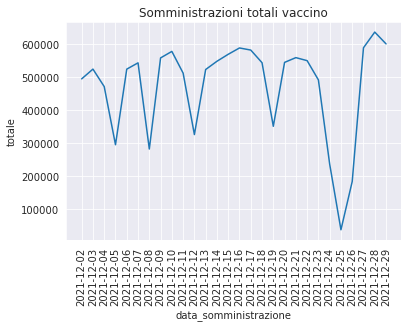

In [35]:
sns.lineplot(x="data_somministrazione", y="totale",\
             data=df_plot)
plt.xticks(rotation=90)
plt.title('Somministrazioni totali vaccino')
plt.show()

### Plot pandas

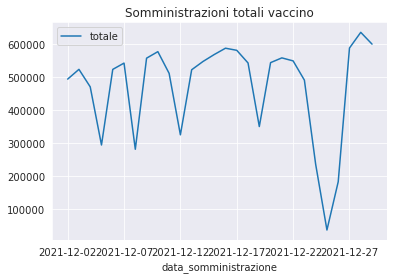

In [36]:
df_plot.plot(y="totale", title = 'Somministrazioni totali vaccino')
plt.show()

### Pandas bokeh

In [37]:
pandas_bokeh.output_notebook()

g = df_plot.plot_bokeh(y="totale", kind='line', vertical_xlabel = True)
#g.xaxis.major_label_orientation = 78



Loading BokehJS ...

In [38]:
df_somministrazione_summary.loc[:,'data_somministrazione'] = pd.to_datetime(\
                            df_somministrazione_summary['data_somministrazione'], format='%Y-%m-%d')
df_somministrazione_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7632 entries, 0 to 7631
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   data_somministrazione     7632 non-null   datetime64[ns]
 1   area                      7632 non-null   object        
 2   totale                    7632 non-null   int64         
 3   sesso_maschile            7632 non-null   int64         
 4   sesso_femminile           7632 non-null   int64         
 5   prima_dose                7632 non-null   int64         
 6   seconda_dose              7632 non-null   int64         
 7   pregressa_infezione       7632 non-null   int64         
 8   dose_addizionale_booster  7632 non-null   int64         
 9   codice_NUTS1              7632 non-null   object        
 10  codice_NUTS2              7632 non-null   object        
 11  codice_regione_ISTAT      7632 non-null   int64         
 12  nome_area           

In [39]:
df_somministrazione_summary

,data_somministrazione,area,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,2021-01-26,MAR,2020,747,1273,77,1942,1,0,ITI,ITI3,11,Marche
1,2021-03-09,CAL,6661,3464,3197,5601,992,68,0,ITF,ITF6,18,Calabria
2,2021-05-17,VEN,26554,13003,13551,15623,10081,850,0,ITH,ITH3,5,Veneto
3,2021-11-02,PUG,11032,5669,5363,1428,4225,171,5208,ITF,ITF4,16,Puglia
4,2021-11-03,ABR,5001,2609,2392,453,1828,65,2655,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7627,2021-04-15,MOL,1974,814,1160,1106,859,9,0,ITF,ITF2,14,Molise
7628,2021-07-11,PAT,1043,567,476,134,900,9,0,ITH,ITH2,4,Provincia Autonoma Trento
7629,2021-08-11,VEN,26868,14844,12024,15653,10596,619,0,ITH,ITH3,5,Veneto
7630,2021-09-19,MOL,15,13,2,13,2,0,0,ITF,ITF2,14,Molise


## Andamento vaccini totale - prima, seconda, booster

In [40]:
df_somm_grouped = df_somministrazione_summary.groupby('data_somministrazione').sum()

In [41]:
df_somm_grouped

,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_regione_ISTAT
data_somministrazione,,,,,,,,
2020-12-27,7343,3499,3844,7328,0,15,0,214
2020-12-28,1503,687,816,1501,0,2,0,85
2020-12-29,1095,483,612,1094,0,1,0,61
2020-12-30,4864,1955,2909,4862,0,2,0,105
2020-12-31,25928,10057,15871,25894,0,34,0,152
...,...,...,...,...,...,...,...,...
2021-12-25,36444,19300,17144,1653,1952,38,32801,191
2021-12-26,182512,90320,92192,16803,7432,229,158048,210
2021-12-27,587380,278929,308451,48797,41607,1086,495890,214


In [42]:
g = df_somm_grouped.plot_bokeh(y = [\
                           'prima_dose','seconda_dose', 'dose_addizionale_booster', 'pregressa_infezione'],
                           vertical_xlabel = True, title="-----------", figsize=(950, 500),\
                               legend="top_left", stacked=True, kind='bar')#, logy=True)

In [43]:
g = df_somm_grouped.plot_bokeh(y = ['totale',\
                           'prima_dose','seconda_dose', 'dose_addizionale_booster', 'pregressa_infezione'],
                           vertical_xlabel = True, title="-----------", figsize=(950, 500),\
                               legend="top_left")#, logy=True)

In [44]:
g = df_somm_grouped.resample(rule='W').mean().plot_bokeh(y = ['totale',\
                           'prima_dose','seconda_dose', 'dose_addizionale_booster', 'pregressa_infezione'],
                           vertical_xlabel = True, title="-----------", figsize=(950, 500),
                                                 legend="top_left")#, logy=True)

In [45]:
df_somministrazione_summary.sort_values('data_somministrazione').head(20)

,data_somministrazione,area,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
7117,2020-12-27,CAL,318,170,148,318,0,0,0,ITF,ITF6,18,Calabria
105,2020-12-27,VDA,20,9,11,20,0,0,0,ITC,ITC2,2,Valle d'Aosta / Vallée d'Aoste
4310,2020-12-27,VEN,880,395,485,879,0,1,0,ITH,ITH3,5,Veneto
3653,2020-12-27,TOS,629,275,354,628,0,1,0,ITI,ITI1,9,Toscana
7225,2020-12-27,LIG,135,56,79,134,0,1,0,ITC,ITC3,7,Liguria
2713,2020-12-27,FVG,265,151,114,265,0,0,0,ITH,ITH4,6,Friuli-Venezia Giulia
4374,2020-12-27,PAT,107,43,64,107,0,0,0,ITH,ITH2,4,Provincia Autonoma Trento
386,2020-12-27,ABR,47,24,23,47,0,0,0,ITF,ITF1,13,Abruzzo
6488,2020-12-27,PAB,145,66,79,145,0,0,0,ITH,ITH1,4,Provincia Autonoma Bolzano / Bozen
4914,2020-12-27,LOM,718,414,304,717,0,1,0,ITC,ITC4,3,Lombardia


In [46]:
df_somministrazione_summary[df_somministrazione_summary['data_somministrazione'] == '2021-12-15']

,data_somministrazione,area,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
295,2021-12-15,PAB,2611,1276,1335,221,285,0,2105,ITH,ITH1,4,Provincia Autonoma Bolzano / Bozen
324,2021-12-15,PUG,47195,22237,24958,2081,1768,39,43307,ITF,ITF4,16,Puglia
479,2021-12-15,MAR,14749,6725,8024,812,446,20,13471,ITI,ITI3,11,Marche
1074,2021-12-15,MOL,3093,1467,1626,134,73,0,2886,ITF,ITF2,14,Molise
1774,2021-12-15,BAS,4173,1922,2251,190,133,9,3841,ITF,ITF5,17,Basilicata
2508,2021-12-15,ABR,13249,6111,7138,702,513,19,12015,ITF,ITF1,13,Abruzzo
3131,2021-12-15,VDA,1485,716,769,61,15,0,1409,ITC,ITC2,2,Valle d'Aosta / Vallée d'Aoste
3209,2021-12-15,LAZ,59884,28585,31299,3462,2006,80,54336,ITI,ITI4,12,Lazio
4018,2021-12-15,CAM,46229,21880,24349,3225,2852,34,40118,ITF,ITF3,15,Campania
4718,2021-12-15,UMB,7739,3614,4125,333,300,7,7099,ITI,ITI2,10,Umbria


In [47]:
df_check = df_somm_grouped.copy()

In [48]:
df_check.loc[:, 'check_totale'] = df_check['prima_dose'] + df_check['seconda_dose'] + df_check['dose_addizionale_booster'] + df_check['pregressa_infezione']

In [49]:
df_check

,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_regione_ISTAT,check_totale
data_somministrazione,,,,,,,,,
2020-12-27,7343,3499,3844,7328,0,15,0,214,7343
2020-12-28,1503,687,816,1501,0,2,0,85,1503
2020-12-29,1095,483,612,1094,0,1,0,61,1095
2020-12-30,4864,1955,2909,4862,0,2,0,105,4864
2020-12-31,25928,10057,15871,25894,0,34,0,152,25928
...,...,...,...,...,...,...,...,...,...
2021-12-25,36444,19300,17144,1653,1952,38,32801,191,36444
2021-12-26,182512,90320,92192,16803,7432,229,158048,210,182512
2021-12-27,587380,278929,308451,48797,41607,1086,495890,214,587380


## Vaccini per fasce anagrafiche

In [74]:
df_somministrazione.tail()

,data_somministrazione,fornitore,area,fascia_anagrafica,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
167850,2021-12-29,Pfizer/BioNTech,VEN,70-79,689,954,39,54,0,1550,ITH,ITH3,5,Veneto
167851,2021-12-29,Pfizer/BioNTech,VEN,80-89,227,410,15,15,0,607,ITH,ITH3,5,Veneto
167852,2021-12-29,Pfizer/BioNTech,VEN,90+,38,144,9,9,0,164,ITH,ITH3,5,Veneto
167853,2021-12-29,Vaxzevria (AstraZeneca),SIC,60-69,0,1,0,1,0,0,ITG,ITG1,19,Sicilia
167854,2021-12-29,Vaxzevria (AstraZeneca),SIC,70-79,1,0,0,1,0,0,ITG,ITG1,19,Sicilia


In [52]:
df_somministrazione.loc[:, 'data_somministrazione'] = pd.to_datetime(df_somministrazione['data_somministrazione'], format='%Y-%m-%d')

In [53]:
df_somministrazione.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167855 entries, 0 to 167854
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   data_somministrazione     167855 non-null  datetime64[ns]
 1   fornitore                 167855 non-null  object        
 2   area                      167855 non-null  object        
 3   fascia_anagrafica         167855 non-null  object        
 4   sesso_maschile            167855 non-null  int64         
 5   sesso_femminile           167855 non-null  int64         
 6   prima_dose                167855 non-null  int64         
 7   seconda_dose              167855 non-null  int64         
 8   pregressa_infezione       167855 non-null  int64         
 9   dose_addizionale_booster  167855 non-null  int64         
 10  codice_NUTS1              167855 non-null  object        
 11  codice_NUTS2              167855 non-null  object        
 12  co

In [75]:
df_somministrazione.tail()

,data_somministrazione,fornitore,area,fascia_anagrafica,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
167850,2021-12-29,Pfizer/BioNTech,VEN,70-79,689,954,39,54,0,1550,ITH,ITH3,5,Veneto
167851,2021-12-29,Pfizer/BioNTech,VEN,80-89,227,410,15,15,0,607,ITH,ITH3,5,Veneto
167852,2021-12-29,Pfizer/BioNTech,VEN,90+,38,144,9,9,0,164,ITH,ITH3,5,Veneto
167853,2021-12-29,Vaxzevria (AstraZeneca),SIC,60-69,0,1,0,1,0,0,ITG,ITG1,19,Sicilia
167854,2021-12-29,Vaxzevria (AstraZeneca),SIC,70-79,1,0,0,1,0,0,ITG,ITG1,19,Sicilia


In [54]:
df_pivot = pd.pivot_table(df_somministrazione, index = ['data_somministrazione', 'fascia_anagrafica'], aggfunc=np.sum)

In [55]:
df_pivot

codice_regione_ISTAT  \
data_somministrazione fascia_anagrafica                         
2020-12-27            20-29                               214   
                      30-39                               214   
                      40-49                               214   
                      50-59                               214   
                      60-69                               214   
...                                                       ...   
2021-12-29            50-59                               454   
                      60-69                               448   
                      70-79                               447   
                      80-89                               428   
                      90+                                 428   

                                         dose_addizionale_booster  \
data_somministrazione fascia_anagrafica                             
2020-12-27            20-29                                     0   
                      30-39                                     0   
                      40-49                                     0   
                      50-59                                     0   
                      60-69                                     0   
...                                                           ...   
2021-12-29            50-59                                114333   
                      60-69                                 96575   
                      70-79                                 80648   
                      80-89                                 18625   
                      90+                                    3589   

                                         pregressa_infezione  prima_dose  \
data_somministrazione fascia_anagrafica                                    
2020-12-27            20-29                                0         704   
                      30-39                                0        1088   
                      40-49                                2        1506   
                      50-59                                3        2203   
                      60-69                                5        1507   
...                                                      ...         ...   
2021-12-29            50-59                               68        2975   
                      60-69                               28        1990   
                      70-79                                5        1191   
                      80-89                                0         553   
                      90+                                  0         145   

                                         seconda_dose  sesso_femminile  \
data_somministrazione fascia_anagrafica                                  
2020-12-27            20-29                         0              446   
                      30-39                         0              598   
                      40-49                         0              939   
                      50-59                         0             1254   
                      60-69                         0              411   
...                                               ...              ...   
2021-12-29            50-59                      4953            62020   
                      60-69                      3203            53344   
                      70-79                      1655            46099   
                      80-89                       530            12341   
                      90+                         152             2818   

                                         sesso_maschile  
data_somministrazione fascia_anagrafica                  
2020-12-27            20-29                         258  
                      30-39                         490  
                      40-49                         569  
                      50-59                         952

In [56]:
df_pivot.loc[:, 'totale_vaccini'] = df_pivot['prima_dose'] + df_pivot['seconda_dose'] + df_pivot['dose_addizionale_booster']

In [57]:
df_pivot.loc['2021-12-01', :]

codice_regione_ISTAT  \
data_somministrazione fascia_anagrafica                         
2021-12-01            12-19                               438   
                      20-29                               441   
                      30-39                               450   
                      40-49                               445   
                      50-59                               445   
                      60-69                               453   
                      70-79                               454   
                      80-89                               428   
                      90+                                 428   

                                         dose_addizionale_booster  \
data_somministrazione fascia_anagrafica                             
2021-12-01            12-19                                  1350   
                      20-29                                 16965   
                      30-39                                 23366   
                      40-49                                 52721   
                      50-59                                 94367   
                      60-69                                 84876   
                      70-79                                 85940   
                      80-89                                 42564   
                      90+                                    9024   

                                         pregressa_infezione  prima_dose  \
data_somministrazione fascia_anagrafica                                    
2021-12-01            12-19                              142        8864   
                      20-29                              168        4123   
                      30-39                              127        5109   
                      40-49                               97        4898   
                      50-59                               75        4172   
                      60-69                               33        2567   
                      70-79                               11        1421   
                      80-89                                4         603   
                      90+                                  0         177   

                                         seconda_dose  sesso_femminile  \
data_somministrazione fascia_anagrafica                                  
2021-12-01            12-19                      3123             6297   
                      20-29                      2941            13529   
                      30-39                      3530            17618   
                      40-49                      3165            32755   
                      50-59                      2886            53727   
                      60-69                      1871            46478   
                      70-79                      1091            45577   
                      80-89                       506            26293   
                      90+                         139             6763   

                                         sesso_maschile  totale_vaccini  
data_somministrazione fascia_anagrafica                                  
2021-12-01            12-19                        7182           13337  
                      20-29                       10668           24029  
                      30-39                       14514           32005  
                      40-49                       28126           60784  
                      50-59                       47773          101425  
                      60-69                       42869           89314  
                      70-79                       42886           88452  
                      80-89                       17384           43673  
                      90+                          2577            9340

In [58]:
df_1 = df_pivot.reset_index('fascia_anagrafica')

In [59]:
df_pivot_2 = df_1.pivot(columns = 'fascia_anagrafica', values = 'totale_vaccini')

In [60]:
df_pivot_2

fascia_anagrafica,05-11,12-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90+
data_somministrazione,,,,,,,,,,
2020-12-27,NaN,NaN,704.0,1088.0,1506.0,2203.0,1507.0,128.0,117.0,75.0
2020-12-28,NaN,NaN,173.0,278.0,368.0,428.0,252.0,NaN,2.0,NaN
2020-12-29,NaN,NaN,88.0,210.0,239.0,330.0,201.0,8.0,9.0,9.0
2020-12-30,NaN,3.0,493.0,886.0,1245.0,1294.0,589.0,95.0,160.0,97.0
2020-12-31,NaN,23.0,2450.0,4368.0,5827.0,7211.0,3600.0,581.0,1041.0,793.0
...,...,...,...,...,...,...,...,...,...,...
2021-12-25,695.0,1713.0,3577.0,4154.0,6992.0,9534.0,5303.0,3628.0,702.0,108.0
2021-12-26,11864.0,8253.0,20274.0,19624.0,32437.0,41182.0,26240.0,18102.0,3736.0,571.0
2021-12-27,26879.0,33903.0,67309.0,63847.0,92205.0,119176.0,95120.0,69886.0,15084.0,2885.0


<AxesSubplot:xlabel='data_somministrazione'>

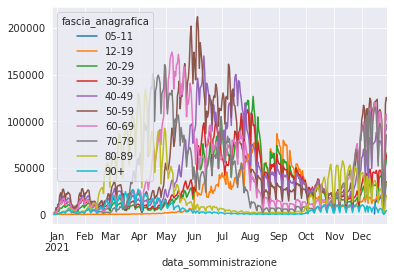

In [61]:
df_pivot_2.plot()

In [72]:
g = df_pivot_2.resample(rule='W').mean().plot_bokeh(vertical_xlabel = True, title="Fasce angrafiche", figsize=(950, 500), legend="top_left")

In [76]:
g = df_pivot_2.fillna(0).resample(rule='W').mean()\
.plot_bokeh(kind = 'bar', vertical_xlabel = True, title="Fasce angrafiche", figsize=(950, 500), stacked = True, legend="top_left")

In [69]:
df_pivot_2

fascia_anagrafica,05-11,12-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90+
data_somministrazione,,,,,,,,,,
2020-12-27,NaN,NaN,704.0,1088.0,1506.0,2203.0,1507.0,128.0,117.0,75.0
2020-12-28,NaN,NaN,173.0,278.0,368.0,428.0,252.0,NaN,2.0,NaN
2020-12-29,NaN,NaN,88.0,210.0,239.0,330.0,201.0,8.0,9.0,9.0
2020-12-30,NaN,3.0,493.0,886.0,1245.0,1294.0,589.0,95.0,160.0,97.0
2020-12-31,NaN,23.0,2450.0,4368.0,5827.0,7211.0,3600.0,581.0,1041.0,793.0
...,...,...,...,...,...,...,...,...,...,...
2021-12-25,695.0,1713.0,3577.0,4154.0,6992.0,9534.0,5303.0,3628.0,702.0,108.0
2021-12-26,11864.0,8253.0,20274.0,19624.0,32437.0,41182.0,26240.0,18102.0,3736.0,571.0
2021-12-27,26879.0,33903.0,67309.0,63847.0,92205.0,119176.0,95120.0,69886.0,15084.0,2885.0
